## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [278]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, roc_auc_score,confusion_matrix, roc_curve, pairwise_distances
from sklearn.cluster import KMeans, SpectralClustering
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [234]:
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
df_cancer = pd.read_csv("../data/wdbc.data", header=None,delimiter=',',names=columns)
df_cancer

,ID,Diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [235]:
df_cancer.replace({'M': 1, 'B': 0}, inplace = True)
df_cancer

,ID,Diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [236]:
X = df_cancer.iloc[:,2:]
y = df_cancer.iloc[:,1]

In [237]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    y_proba = model.decision_function(X)
    return {
        'accuracy': accuracy_score(y, y_pred),
        'precision': precision_score(y, y_pred),
        'recall': recall_score(y, y_pred),
        'f1': f1_score(y, y_pred),
        'auc': roc_auc_score(y, y_proba),
        'confusion_matrix': confusion_matrix(y, y_pred),
        'fpr': roc_curve(y, y_proba)[0],
        'tpr': roc_curve(y, y_proba)[1]
    }

In [238]:
def calc_average(model_list):
    print(f'Accuracy: {np.mean([x['accuracy'] for x in model_list])}')
    print(f'Precision: {np.mean([x['accuracy'] for x in model_list])}')
    print(f'Recall: {np.mean([x['recall'] for x in model_list])}')
    print(f'F1 score: {np.mean([x['f1'] for x in model_list])}')
    print(f'AUC: {np.mean([x['auc'] for x in model_list])}')

### (b) Monte-Carlo Simulation

#### (i) Supervised Learning

In [315]:
supervised_train = []
supervised_test = []
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    param_grid = {'C': np.logspace(-3, 3, 20)}
    
    svm = LinearSVC(penalty='l1', dual=False, max_iter=10000)
    grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    
    best_svm = grid_search.best_estimator_
    train_metrics = evaluate_model(best_svm, X_train_scaled, y_train)
    test_metrics = evaluate_model(best_svm, X_test_scaled, y_test)
    
    supervised_train.append(train_metrics)
    supervised_test.append(test_metrics)

Analysis for Train:
Average scores - 
Accuracy: 0.9851282051282052
Precision: 0.9851282051282052
Recall: 0.9686274509803919
F1 score: 0.9798425700148381
AUC: 0.9971076711386309
Confusion Matrix:
[[283   2]
 [  8 162]]


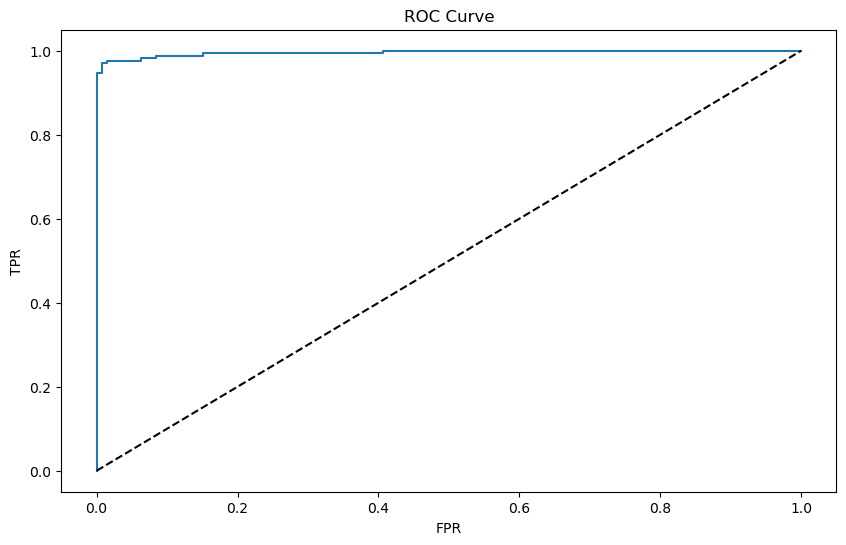

In [317]:
print("Analysis for Train:")
print("Average scores - ")
calc_average(supervised_train)
print("Confusion Matrix:")
print(supervised_train[10]['confusion_matrix'])
plt.figure(figsize=(10, 6))
plt.plot(supervised_train[10]['fpr'], 
         supervised_train[10]['tpr'], 
         label="TRAIN ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

Analysis for Test:
Average scores - 
Accuracy: 0.9736842105263155
Precision: 0.9736842105263155
Recall: 0.949206349206349
F1 score: 0.9635439282047302
AUC: 0.99375
Confusion Matrix:
[[71  1]
 [ 1 41]]


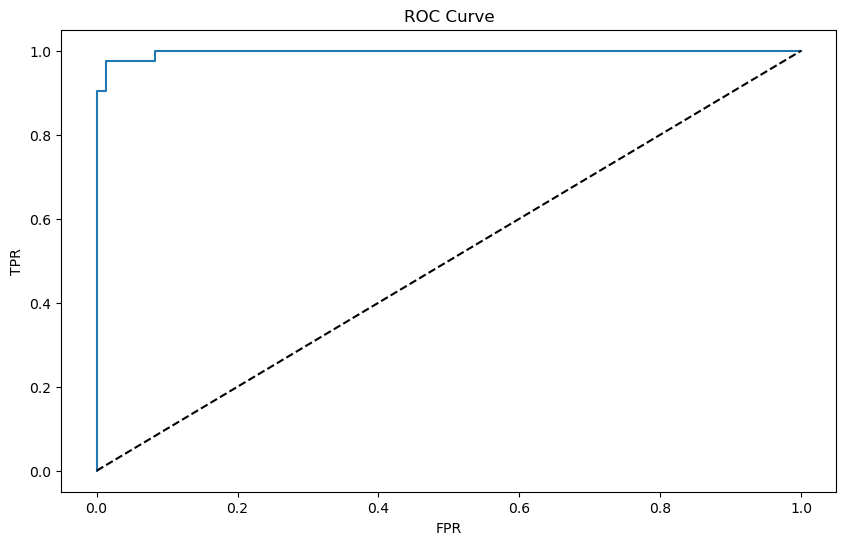

In [321]:
print("Analysis for Test:")
print("Average scores - ")
calc_average(supervised_test)
print("Confusion Matrix:")
print(supervised_test[10]['confusion_matrix'])
plt.figure(figsize=(10, 6))
plt.plot(supervised_test[10]['fpr'], 
         supervised_test[10]['tpr'], 
         label="TEST ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

#### (ii) Semi-Supervised Learning/ Self-training

##### (A) (B)

In [246]:
semi_supervised_train = []
semi_supervised_test = []
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y )
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 50% split
    X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
        X_train_scaled, y_train, train_size=0.5, stratify=y_train)
    
    param_grid = {'C': np.logspace(-3, 3, 20)}
    svm = LinearSVC(penalty='l1', dual=False, max_iter=10000)
    grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_labeled, y_labeled)
    best_params = grid_search.best_params_
    
    current_svm = LinearSVC(penalty='l1', dual=False, max_iter=10000, **best_params)
    current_svm.fit(X_labeled, y_labeled)
    
    # (B)
    while X_unlabeled.shape[0] > 0:
        distances = np.abs(current_svm.decision_function(X_unlabeled))
        farthest_pt = np.argmax(distances)
        x_farthest = X_unlabeled[farthest_pt]
        y_pred_farthest = current_svm.predict([x_farthest])
        
        X_labeled = np.vstack([X_labeled, x_farthest])
        y_labeled = np.append(y_labeled, y_pred_farthest)
        X_unlabeled = np.delete(X_unlabeled, farthest_pt, axis=0)
        
        current_svm = LinearSVC(penalty='l1', dual=False, max_iter=10000, **best_params)
        current_svm.fit(X_labeled, y_labeled)
    
    train_metrics = evaluate_model(current_svm, X_train_scaled, y_train)
    test_metrics = evaluate_model(current_svm, X_test_scaled, y_test)
    
    semi_supervised_train.append(train_metrics)
    semi_supervised_test.append(test_metrics)

Analysis for Train:
Average scores - 
Accuracy: 0.9751648351648352
Precision: 0.9751648351648352
Recall: 0.9521568627450977
F1 score: 0.9662443924445293
AUC: 0.9944100447196422
Confusion Matrix:
[[281   4]
 [  9 161]]


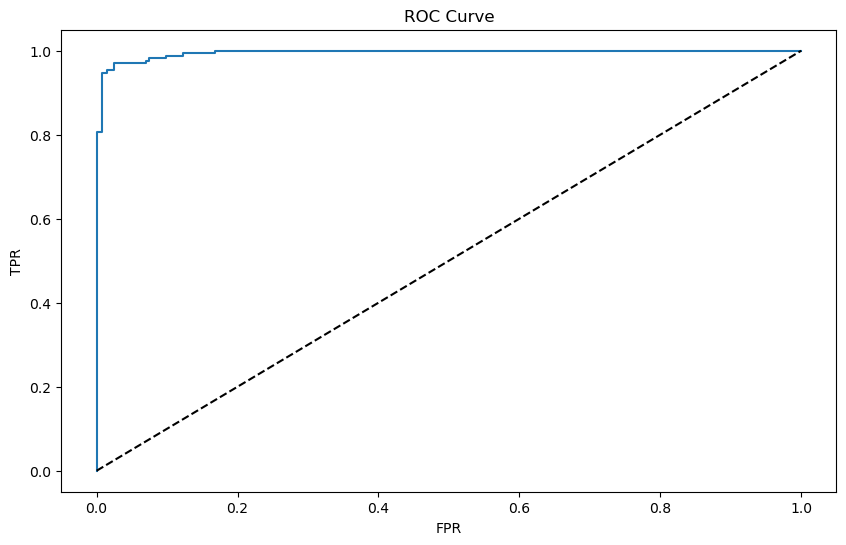

In [247]:
print("Analysis for Train:")
print("Average scores - ")
calc_average(semi_supervised_train)
print("Confusion Matrix:")
print(semi_supervised_train[10]['confusion_matrix'])
plt.figure(figsize=(10, 6))
plt.plot(semi_supervised_train[10]['fpr'], 
         semi_supervised_train[10]['tpr'], 
         label="TRAIN ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

Analysis for Test:
Average scores - 
Accuracy: 0.9663742690058478
Precision: 0.9663742690058478
Recall: 0.9357142857142856
F1 score: 0.953293683795884
AUC: 0.9926036155202822
Confusion Matrix:
[[71  1]
 [ 4 38]]


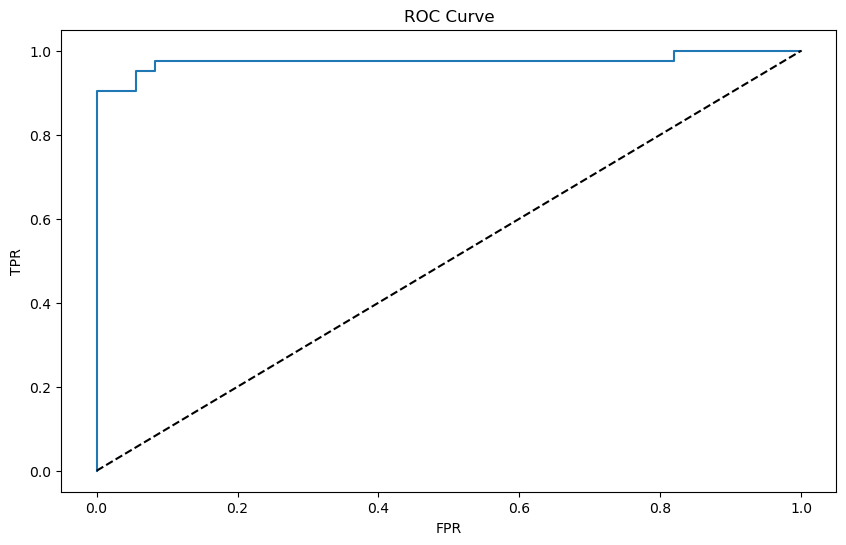

In [325]:
print("Analysis for Test:")
print("Average scores - ")
calc_average(semi_supervised_test)
print("Confusion Matrix:")
print(semi_supervised_test[15]['confusion_matrix'])
plt.figure(figsize=(10, 6))
plt.plot(semi_supervised_test[15]['fpr'], 
         semi_supervised_test[15]['tpr'], 
         label="TEST ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

#### (iii) Unsupervised Learning

##### (A) (B) (C)

(A) To avoid being trapped in a local minimum, set the number of iterations.

In [251]:
kmeans_train = []
kmeans_test = []

def unsupervised_kmeans(X_train, y_train, X_test, y_test):
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    best_kmeans = None
    best_inertia = float('inf')
    # (A)
    for _ in range(10):
        kmeans = KMeans(n_clusters=2, init='random', n_init=1)
        kmeans.fit(X_train_scaled)
        if kmeans.inertia_ < best_inertia:
            best_inertia = kmeans.inertia_
            best_kmeans = kmeans
    
    centers = best_kmeans.cluster_centers_
    train_distances = cdist(X_train_scaled, centers)
    test_distances = cdist(X_test_scaled, centers)
    
    cluster_labels = {}

    # (B)
    for cluster_idx in range(2):
        closest_indices = np.argsort(train_distances[:, cluster_idx])[:30]
        closest_labels = y_train[closest_indices]
         #closest_indices = closest_indices[closest_indices < len(y_train)]
        majority_label = Counter(closest_labels).most_common(1)[0][0]
        cluster_labels[cluster_idx] = majority_label
    
    train_clusters = best_kmeans.predict(X_train_scaled)
    y_train_pred = np.array([cluster_labels[c] for c in train_clusters])

    #(C)
    test_clusters = best_kmeans.predict(X_test_scaled)
    y_test_pred = np.array([cluster_labels[c] for c in test_clusters])
    
    train_metrics = {
        'accuracy': accuracy_score(y_train, y_train_pred),
        'precision': precision_score(y_train, y_train_pred),
        'recall': recall_score(y_train, y_train_pred),
        'f1': f1_score(y_train, y_train_pred),
        'auc': roc_auc_score(y_train, -train_distances[:, 0]),  # Using negative distance as score
        'confusion_matrix': confusion_matrix(y_train, y_train_pred)
    }
    
    test_metrics = {
        'accuracy': accuracy_score(y_test, y_test_pred),
        'precision': precision_score(y_test, y_test_pred),
        'recall': recall_score(y_test, y_test_pred),
        'f1': f1_score(y_test, y_test_pred),
        'auc': roc_auc_score(y_test, -test_distances[:, 0]),
        'confusion_matrix': confusion_matrix(y_test, y_test_pred)
    }
    
    return train_metrics, test_metrics, best_kmeans

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    train_metrics, test_metrics, _ = unsupervised_kmeans(X_train, y_train, X_test, y_test)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    kmeans = KMeans(n_clusters=2).fit(X_train_scaled)
    train_distances = kmeans.transform(X_train_scaled)
    test_distances = kmeans.transform(X_test_scaled)
    
    train_metrics['fpr'], train_metrics['tpr'], _ = roc_curve(y_train, -train_distances[:, 0] )
    test_metrics['fpr'], test_metrics['tpr'], _ = roc_curve(y_test, -test_distances[:, 0])
    
    kmeans_train.append(train_metrics)
    kmeans_test.append(test_metrics)

Analysis for Train:
Average scores - 
Accuracy: 0.9087179487179488
Precision: 0.9087179487179488
Recall: 0.823921568627451
F1 score: 0.8709320153186383
AUC: 0.43436050911592705
Confusion Matrix:
[[281   4]
 [  8 162]]


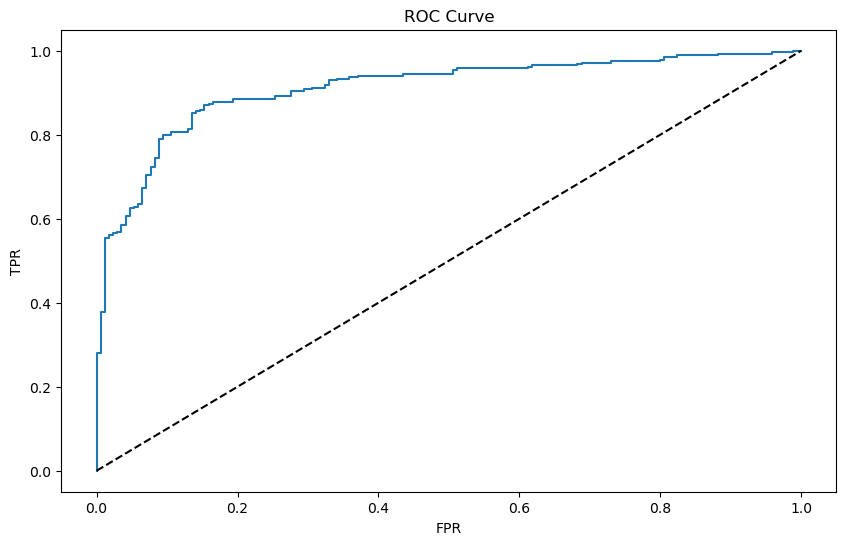

In [335]:
print("Analysis for Train:")
print("Average scores - ")
calc_average(kmeans_train)
print("Confusion Matrix:")
print(semi_supervised_train[15]['confusion_matrix'])
plt.figure(figsize=(10, 6))
plt.plot(kmeans_train[15]['tpr'], 
         kmeans_train[15]['fpr'], 
         label="TRAIN ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

Analysis for Test:
Average scores - 
Accuracy: 0.9663742690058478
Precision: 0.9663742690058478
Recall: 0.9357142857142856
F1 score: 0.953293683795884
AUC: 0.9926036155202822
Confusion Matrix:
[[69  3]
 [ 3 39]]


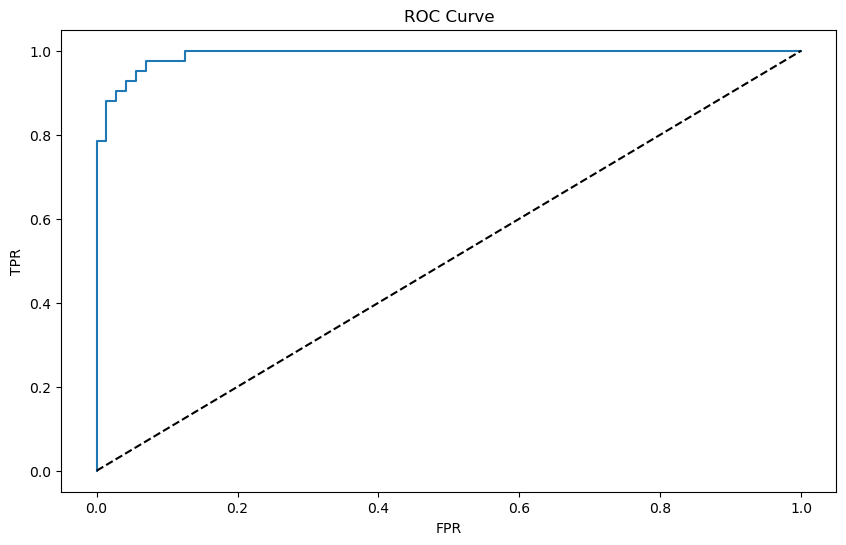

In [333]:
print("Analysis for Test:")
print("Average scores - ")
calc_average(semi_supervised_test)
print("Confusion Matrix:")
print(semi_supervised_test[20]['confusion_matrix'])
plt.figure(figsize=(10, 6))
plt.plot(semi_supervised_test[20]['fpr'], 
         semi_supervised_test[20]['tpr'], 
         label="TEST ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

#### (iv) Spectral Clustering

In [255]:
spectral_train = []
spectral_test = []

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    best_gamma = 1.0

    sc = SpectralClustering(n_clusters=2, affinity='rbf', gamma=best_gamma)
    train_clusters = sc.fit_predict(X_train_scaled)
    
    cluster_labels = np.zeros_like(y_train)
    for cluster in range(2):
        majority_label = np.bincount(y_train[train_clusters == cluster]).argmax()
        cluster_labels[train_clusters == cluster] = majority_label
    
    train_metrics = {
        'accuracy': accuracy_score(y_train, cluster_labels),
        'precision': precision_score(y_train, cluster_labels),
        'recall': recall_score(y_train, cluster_labels),
        'f1': f1_score(y_train, cluster_labels),
        'auc': roc_auc_score(y_train, train_clusters),
        'confusion_matrix': confusion_matrix(y_train, cluster_labels),
        'fpr': roc_curve(y_train, train_clusters)[0],
        'tpr': roc_curve(y_train, train_clusters)[1]
    }
    
    combined_data = np.vstack([X_train_scaled, X_test_scaled])
    combined_clusters = sc.fit_predict(combined_data)
    test_clusters = combined_clusters[len(X_train_scaled):]
    
    test_cluster_labels = np.zeros_like(y_test)
    for cluster in range(2):
        train_cluster = train_clusters[y_train == cluster_labels[0]][0]
        test_cluster_labels[test_clusters == cluster] = (0 if cluster == train_cluster else 1)
    
    test_metrics = {
        'accuracy': accuracy_score(y_test, test_cluster_labels),
        'precision': precision_score(y_test, test_cluster_labels),
        'recall': recall_score(y_test, test_cluster_labels),
        'f1': f1_score(y_test, test_cluster_labels),
        'auc': roc_auc_score(y_test, test_clusters),
        'confusion_matrix': confusion_matrix(y_test, test_cluster_labels),
        'fpr': roc_curve(y_test, test_clusters)[0],
        'tpr': roc_curve(y_test, test_clusters)[1]
    }
    
    spectral_train.append(train_metrics)
    spectral_test.append(test_metrics)



In [337]:
print("Analysis for Train:")
print("Average scores - ")
calc_average(spectral_train)
print("Confusion Matrix:")
print(spectral_train[10]['confusion_matrix'])


Analysis for Train:
Average scores - 
Accuracy: 0.6297435897435899
Precision: 0.6297435897435899
Recall: 0.009019607843137257
F1 score: 0.017843057255541955
AUC: 0.5042758857929136
Confusion Matrix:
[[285   0]
 [168   2]]


In [339]:
print("Analysis for Train:")
print("Average scores - ")
calc_average(spectral_test)
print("Confusion Matrix:")
print(spectral_test[10]['confusion_matrix'])


Analysis for Train:
Average scores - 
Accuracy: 0.6345029239766082
Precision: 0.6345029239766082
Recall: 0.007936507936507936
F1 score: 0.01536293164200141
AUC: 0.503968253968254
Confusion Matrix:
[[72  0]
 [42  0]]


#### (iv) Compare

In [343]:
print("Accuracy for Supervised: Train - 0.9851282051282052   Test - 0.9736842105263155")
print("Accuracy for Semi-Supervised: Train - 0.9751648351648352    Test - 0.9663742690058478")
print("Accuracy for KMeans: Train - 0.9087179487179488   Test - 0.9663742690058478 ")
print("Accuracy for Spectral Clustering: Train - 0.6297435897435899    Test - 0.6345029239766082")

Accuracy for Supervised: Train - 0.9851282051282052   Test - 0.9736842105263155
Accuracy for Semi-Supervised: Train - 0.9751648351648352    Test - 0.9663742690058478
Accuracy for KMeans: Train - 0.9087179487179488   Test - 0.9663742690058478 
Accuracy for Spectral Clustering: Train - 0.6297435897435899    Test - 0.6345029239766082


## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [262]:
df_bank = pd.read_csv('../data/data_banknote_authentication.txt', header = None)
df_bank.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df_bank

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [274]:
X_bank = df_bank.iloc[:, :-1].values
y_bank = df_bank.iloc[:, -1].values

X_train_bank, X_test_bank, y_train_bank, y_test_bank = train_test_split(
    X_bank, y_bank, test_size=472, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

In [280]:
def passive(X_train, y_train, X_test, y_test):
   
    svm_params = {'C': np.logspace(-3, 6, 10)} 
    errors = np.zeros((50, 90))
    
    for run in range(50):
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        X_shuffled = X_train[indices]
        y_shuffled = y_train[indices]
        
        pool_indices = []
        available_indices = list(range(len(X_shuffled)))
        
        for i in range(90):
            selected = np.random.choice(available_indices, size=min(10, len(available_indices)), replace=False)
            pool_indices.extend(selected)
            available_indices = [idx for idx in available_indices if idx not in selected]
            
            X_pool = X_shuffled[pool_indices]
            y_pool = y_shuffled[pool_indices]
            clf = GridSearchCV(SVC(kernel='linear', random_state=42), svm_params, cv=5, scoring='accuracy')
            clf.fit(X_pool, y_pool)
         
            y_pred = clf.best_estimator_.predict(X_test)
            errors[run, i] = 1 - accuracy_score(y_test, y_pred)
    
    return errors

passive_errors = passive(X_train_scaled, y_train, X_test_scaled, y_test)
mean_passive_errors = np.mean(passive_errors, axis=0)
   

#### (ii) Active

In [294]:
def active(X_train, y_train, X_test, y_test):
    svm_params = {'C': np.logspace(-3, 3, 5)} 
    n_samples = len(X_train)
    n_increments = min(90, n_samples//10)
    errors = np.zeros((50, n_increments))
    
    for run in range(50):
        indices = np.random.permutation(n_samples)
        X_shuffled = X_train[indices]
        y_shuffled = y_train[indices]
        pool_indices = list(range(10))
        available_indices = list(range(10, n_samples))
        
        for i in range(n_increments):
            X_pool = X_shuffled[pool_indices]
            y_pool = y_shuffled[pool_indices]
            
            clf = GridSearchCV(SVC(kernel='linear'), svm_params, cv=min(5, len(y_pool)//2))
            clf.fit(X_pool, y_pool)

            y_pred = clf.predict(X_test)
            errors[run, i] = 1 - accuracy_score(y_test, y_pred)
            
            if not available_indices:
                break
            if len(available_indices) > 0:
                distances = np.abs(clf.decision_function(X_shuffled[available_indices]))
                closest = np.argsort(distances)[:min(10, len(available_indices))]
                new_indices = [available_indices[idx] for idx in closest]
                pool_indices.extend(new_indices)
                available_indices = [idx for idx in available_indices if idx not in new_indices]
    
    return errors

active_errors = active(X_train_scaled, y_train, X_test_scaled, y_test)
mean_active_errors = np.mean(active_errors, axis=0)

### (c) Average the 50 test errors

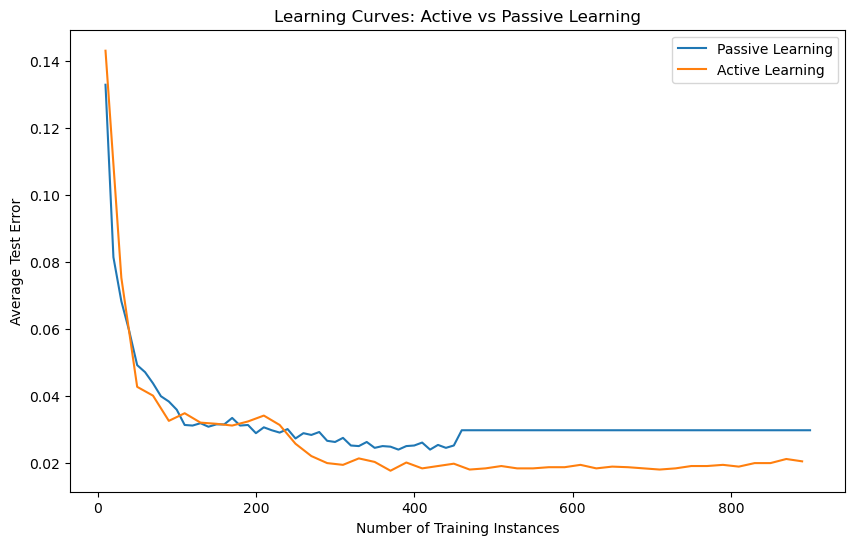

In [341]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(10, 901, 10), mean_passive_errors, label='Passive Learning')
plt.plot(np.arange(10, 901, 20), mean_active_errors, label='Active Learning')
plt.xlabel('Number of Training Instances')
plt.ylabel('Average Test Error')
plt.title('Learning Curves: Active vs Passive Learning')
plt.legend()
plt.show()   

Observation: Active learning is performing better than passive learning.

References: <br>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.decision_function <br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html <br>
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html <br>
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html <br>
